# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [103]:
fashion_mnist = keras.datasets.fashion_mnist

In [104]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [105]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [107]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [108]:
X_train.shape

(60000, 28, 28)

In [109]:
X_test.shape

(10000, 28, 28)

In [112]:
X_test[0].size

784

In [114]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [115]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [117]:
df_classes = pd.DataFrame(data = np.unique(y_train), columns= ['Labels'])

In [118]:
df_classes['Class_names'] = class_names

In [119]:
df_classes

,Labels,Class_names
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

In [123]:
y_train[0]

9

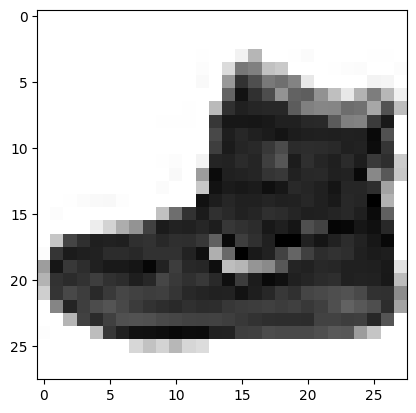

In [124]:
plt.imshow(X_train[0], cmap= 'binary');

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [125]:
X_train.min()

0

In [126]:
X_train.max()

255

In [127]:
X_train_scal = X_train/255
X_test_scal = X_test/255

In [128]:
print(X_train_scal.min())
print(X_train_scal.max())

0.0
1.0


Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

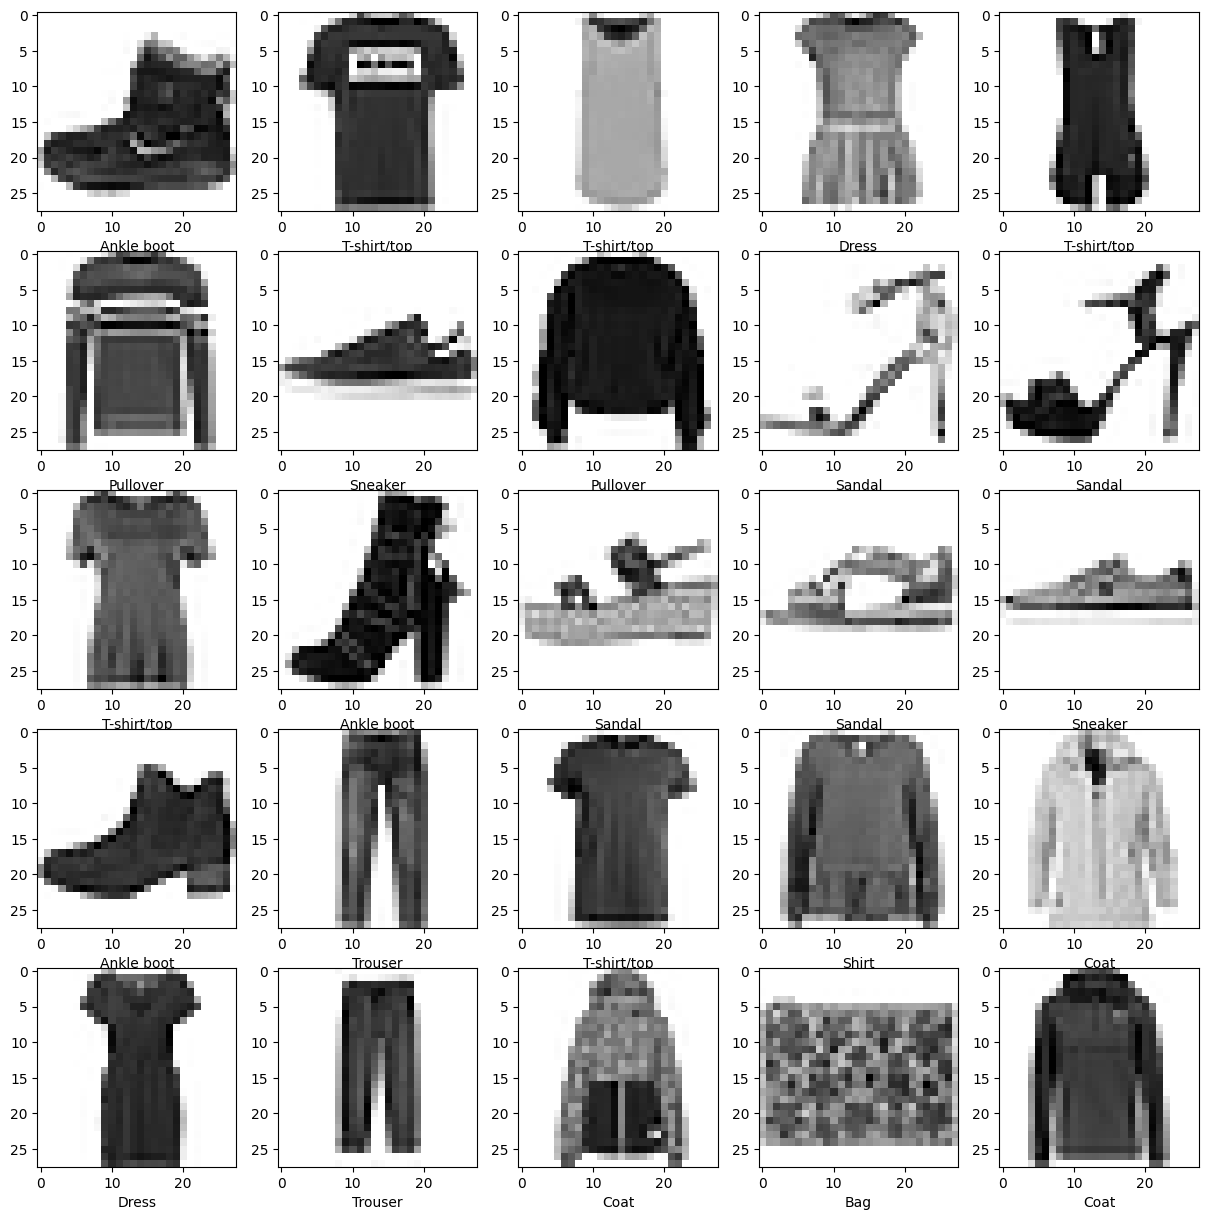

In [129]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [130]:
capas = [keras.layers.Flatten(input_shape=(28, 28)),
         keras.layers.Dense(units= 300, activation= 'relu'),
        keras.layers.Dense(units= 100, activation= 'relu'),
        keras.layers.Dense(units=10, activation= 'softmax')]

model = keras.Sequential(capas)

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [131]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [132]:
history = model.fit(X_train_scal, y_train, batch_size= 1000, epochs= 10, validation_split= 0.20)

Epoch 1/10
48/48 [==============================] - 3s 34ms/step - loss: 0.8099 - accuracy: 0.7320 - val_loss: 0.5245 - val_accuracy: 0.8177
Epoch 2/10
48/48 [==============================] - 1s 23ms/step - loss: 0.4695 - accuracy: 0.8352 - val_loss: 0.4458 - val_accuracy: 0.8420
Epoch 3/10
48/48 [==============================] - 1s 23ms/step - loss: 0.4195 - accuracy: 0.8532 - val_loss: 0.4136 - val_accuracy: 0.8573
Epoch 4/10
48/48 [==============================] - 1s 23ms/step - loss: 0.3895 - accuracy: 0.8631 - val_loss: 0.3993 - val_accuracy: 0.8614
Epoch 5/10
48/48 [==============================] - 1s 22ms/step - loss: 0.3675 - accuracy: 0.8708 - val_loss: 0.3750 - val_accuracy: 0.8662
Epoch 6/10
48/48 [==============================] - 1s 25ms/step - loss: 0.3456 - accuracy: 0.8777 - val_loss: 0.3629 - val_accuracy: 0.8708
Epoch 7/10
48/48 [==============================] - 1s 25ms/step - loss: 0.3280 - accuracy: 0.8844 - val_loss: 0.3504 - val_accuracy: 0.8748
Epoch 8/10
48

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [133]:
model.evaluate(X_test_scal, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8727


[0.3607375919818878, 0.8726999759674072]

In [134]:
y_test_predict = model.predict(X_test_scal)

313/313 [==============================] - 1s 4ms/step


In [135]:
from sklearn.metrics import accuracy_score

In [143]:
y_test_predict = y_test_predict.argmax(axis = 1)

In [144]:
accuracy_score(y_test, y_test_predict)

0.8727

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [147]:
y_test[0]

9

In [148]:
model.predict(X_test_scal[[0]]).argmax()

1/1 [==============================] - 0s 43ms/step


9

El modelo ha predicho la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [ ]:
#Hecho

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [149]:
model.predict(X_test_scal[[0]])

1/1 [==============================] - 0s 49ms/step


array([[3.8825092e-06, 1.6726698e-07, 4.1369927e-05, 3.6673421e-06,
        8.5627053e-06, 8.0089746e-03, 2.5905705e-05, 4.5338072e-02,
        7.6381146e-04, 9.4580561e-01]], dtype=float32)

In [154]:
df_classes.iloc[model.predict(X_test_scal[[0]]).argmax()]

1/1 [==============================] - 0s 34ms/step


Labels                  9
Class_names    Ankle boot
Name: 9, dtype: object

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

In [155]:
y_test[0]

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [156]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [157]:
y_test_predict = model.predict(X_test_scal)

313/313 [==============================] - 1s 4ms/step


Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

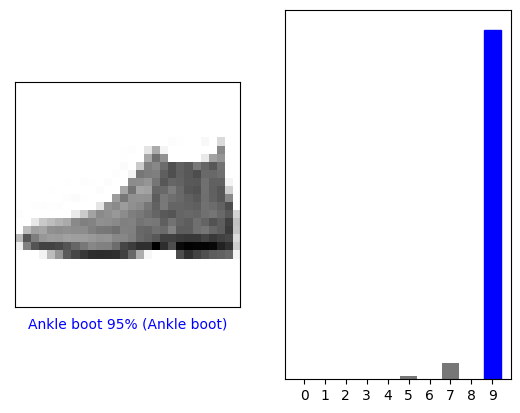

In [158]:
plt.subplot(1, 2, 1)
plot_image(0, y_test_predict[0], y_test, X_test)

plt.subplot(1, 2, 2)
plot_value_array(0, y_test_predict[0], y_test)

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

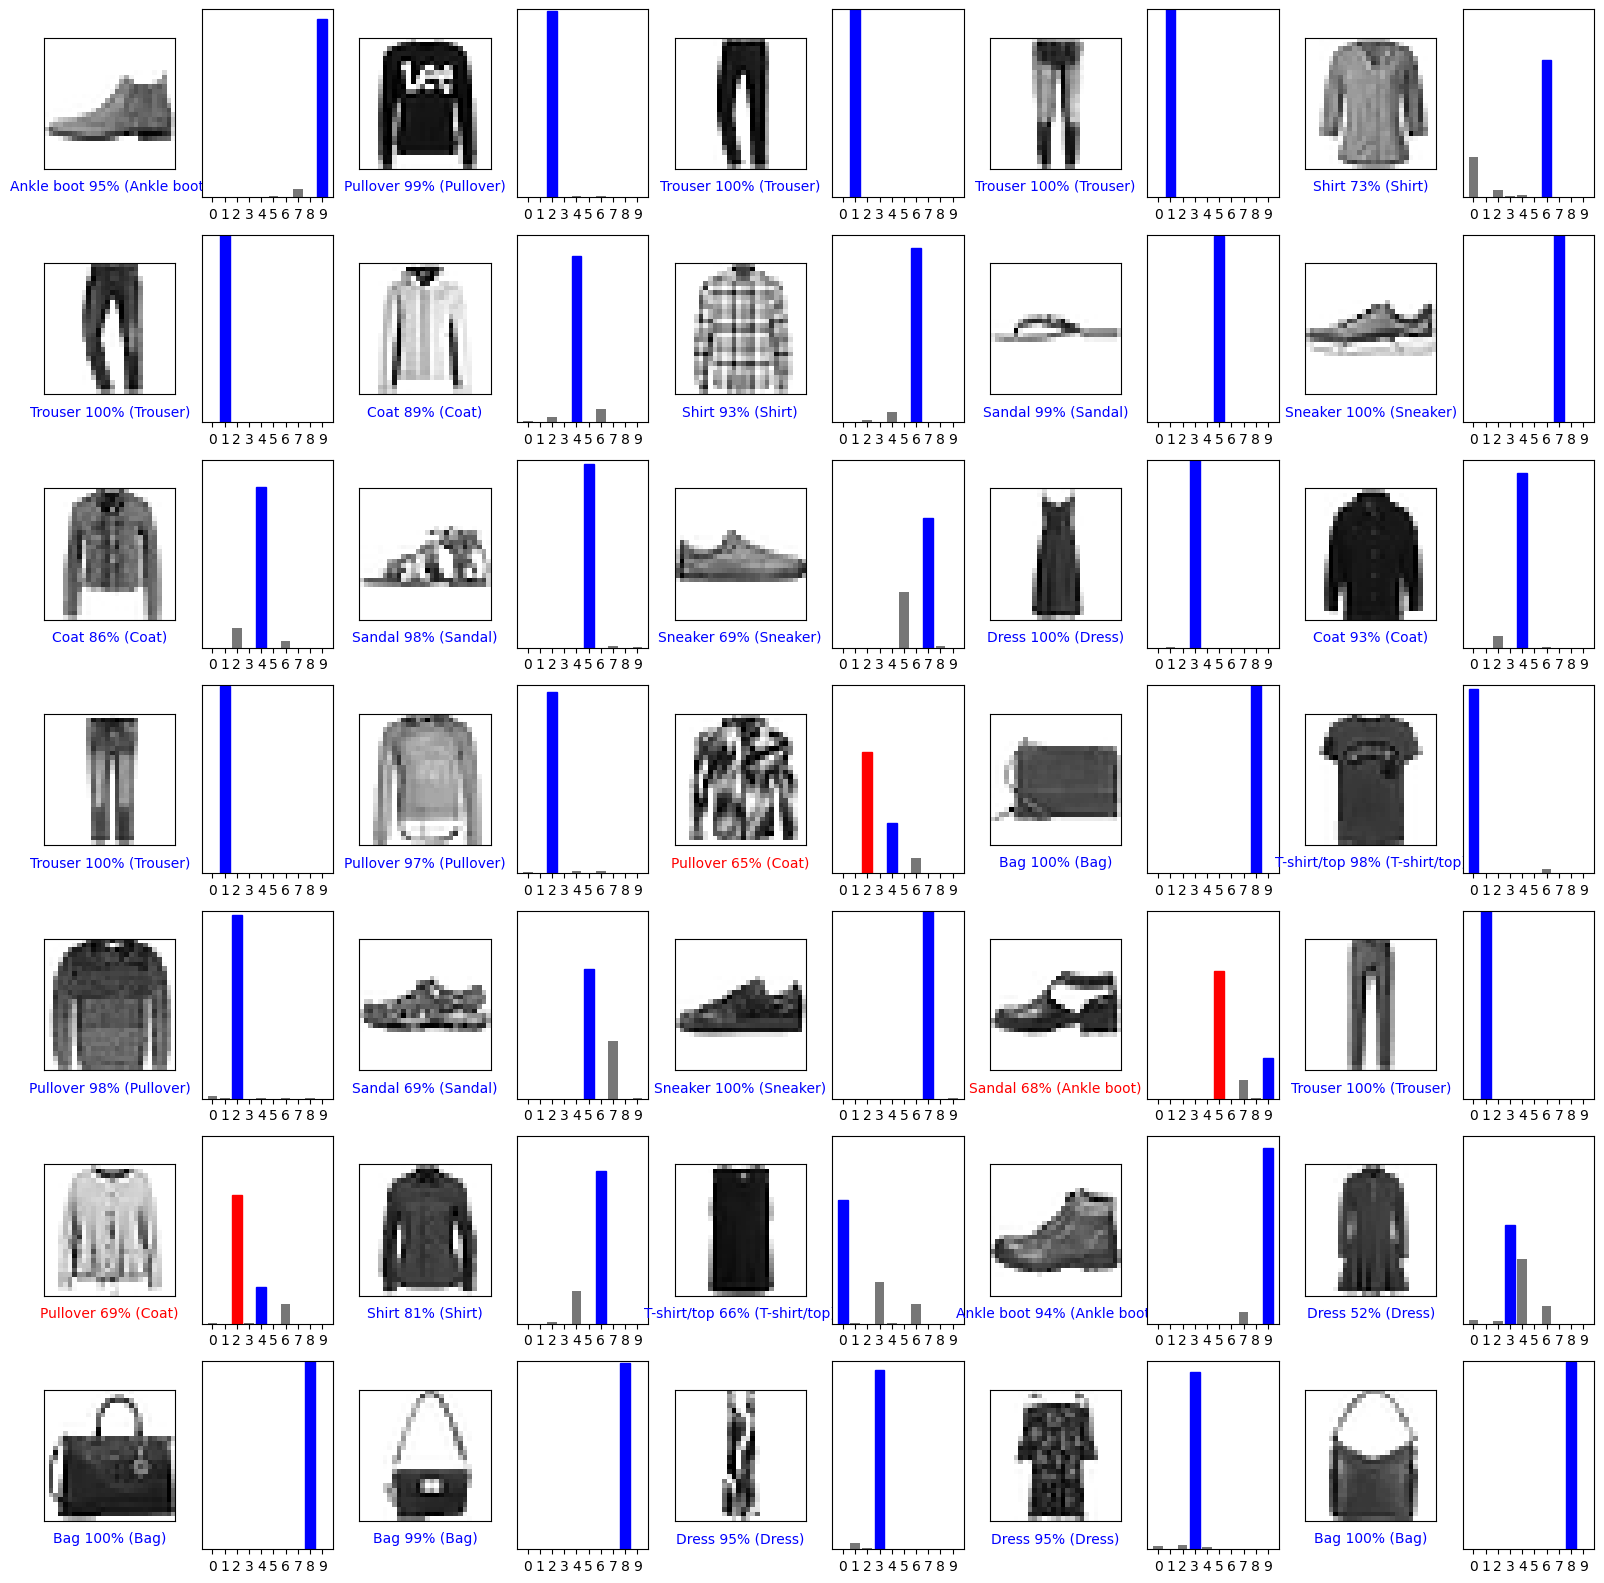

In [160]:
n_rows = 7
n_cols = 5
n_im = n_rows * n_cols
plt.figure(figsize=(20,20))

for i in range(n_im):
    plt.subplot(n_rows, n_cols*2 , 2*i + 1)
    plot_image(i, y_test_predict[i], y_test, X_test)
    plt.subplot(n_rows, n_cols*2, 2*i + 2)
    plot_value_array(i, y_test_predict[i], y_test)

plt.show()

Evalúa tu modelo con una matriz de confusión e interprétala.

In [163]:
from sklearn.metrics import confusion_matrix

In [162]:
y_test_predict.argmax(axis = 1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

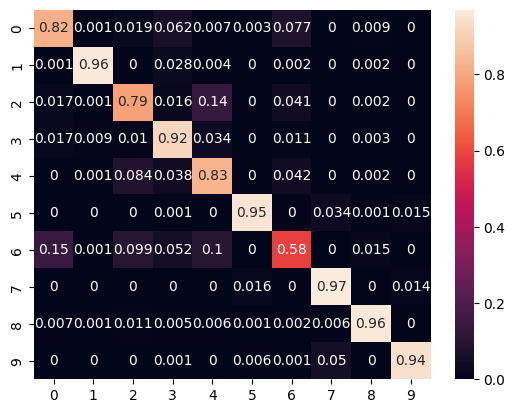

In [166]:
sns.heatmap(confusion_matrix(y_test, y_test_predict.argmax(axis = 1), normalize = 'true'), annot = True);

In [167]:
df_classes

,Labels,Class_names
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [170]:
model.predict(X_test_scal[2]).argmax()

1/1 [==============================] - 0s 42ms/step


1

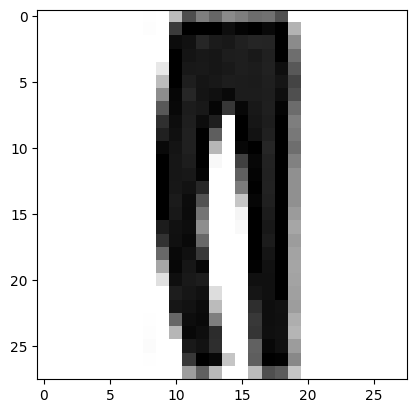

In [173]:
plt.imshow(X_test[2], cmap= 'binary');